In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
train = pd.read_csv("AID688red_train.csv")
test = pd.read_csv("AID688red_test.csv")

train.head(5)

,NEG_01_NEG,NEG_02_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_03_POS,NEG_04_POS,NEG_05_POS,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
0,0,0,0,0,0,0,0,0,0,0,...,3.6054,1.959,94.04,2,4,1,229.264,0,1,Inactive
1,0,0,0,0,0,0,0,0,0,0,...,3.4298,0.706,75.63,6,5,2,239.271,0,1,Inactive
2,0,0,0,0,0,0,0,0,0,0,...,3.6695,1.809,91.81,6,6,2,417.405,0,0,Inactive
3,0,0,0,0,0,0,0,0,0,0,...,3.4617,1.259,95.86,1,5,2,311.366,0,1,Inactive
4,0,0,0,0,0,0,0,0,0,0,...,3.5853,1.777,85.75,3,6,4,372.428,0,2,Inactive


In [3]:
#Create X and Y variables for training and testing
X_train = train.drop("Outcome",axis=1)
X_test = test.drop("Outcome",axis=1)

Y_train = train["Outcome"]
Y_test = test["Outcome"]

In [4]:
#Import and initialise classifier
from sklearn.ensemble import ExtraTreesClassifier
model_instance_1 = ExtraTreesClassifier(random_state=3)

#Fit the training sets to the model
model_instance_1.fit(X_train,Y_train)

#Determine the accuracy of the model
model_instance_1.score(X_test,Y_test)

0.9889665318131666

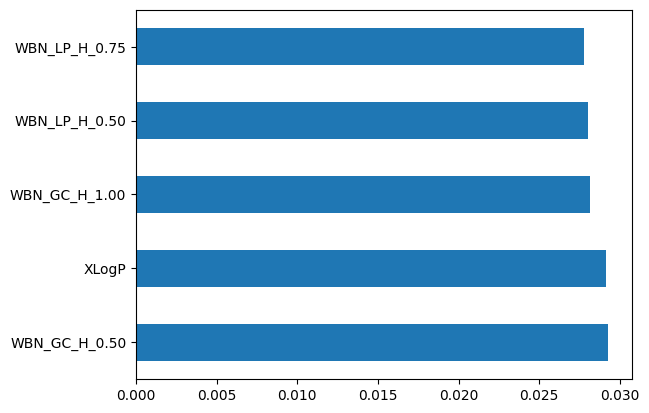

In [5]:
#Further actions to improve model accuracy
model_instance_2 = ExtraTreesClassifier(random_state=3)
model_instance_2.fit(X_train,Y_train)

#Get feature importances of the model and select the top 5
feat_importances = pd.Series(model_instance_2.feature_importances_,index=X_train.columns)
feat_importances.nlargest(5).plot(kind="barh")
plt.show()

In [6]:
#Create a new train and test set using the columns taht fall under the top 5 largest feature importances
columns = list(feat_importances.nlargest(5).index)
x_train = X_train[columns]
x_test = X_test[columns]

model_instance_3 = ExtraTreesClassifier(random_state=3)
model_instance_3.fit(x_train,Y_train)
model_instance_3.score(x_test,Y_test)

0.9900698786318499